<b>Data  Science Project


# Hate  Speech Detection

<b> Problem Statement: </b>The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing  Hate speech.

## Import Libraries

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.text import Text

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
df = pd.read_csv("C://Users//Niharika//Downloads//Twitter Hate Speech (1).csv", usecols = ['label', 'tweet'])
df.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


# Data Information

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


## Features that we have in this data

In [4]:
df.columns

Index(['label', 'tweet'], dtype='object')

# Type of Data

In [5]:
df.dtypes

label     int64
tweet    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


# Data Size

In [7]:
df.size

63924

# Predictor and Target Attribute

In [8]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,tweet
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."
31961,thank you @user for you follow


In [9]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,label
31957,0
31958,0
31959,0
31960,1
31961,0


# Check the Missing Value

In [10]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

# Extracting the Target Attribute for Each Class and Visualize

In [11]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


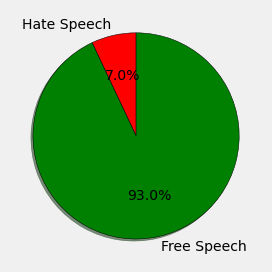

In [12]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

# Data Preprocessing

Lower Case

In [13]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

Remove Punctuation

In [14]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

Remove URLs

In [15]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

Removing @tags

In [16]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

Remove Special Characters

In [17]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

Tokenizing

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tweet'] = df['tweet'].apply(tokenize)

Removing StopWords

In [20]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

df['tweet'] = df['tweet'].apply(remove_stop)

Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['tweet'] = df['tweet'].apply(Lemmatize)

WordCloud

In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

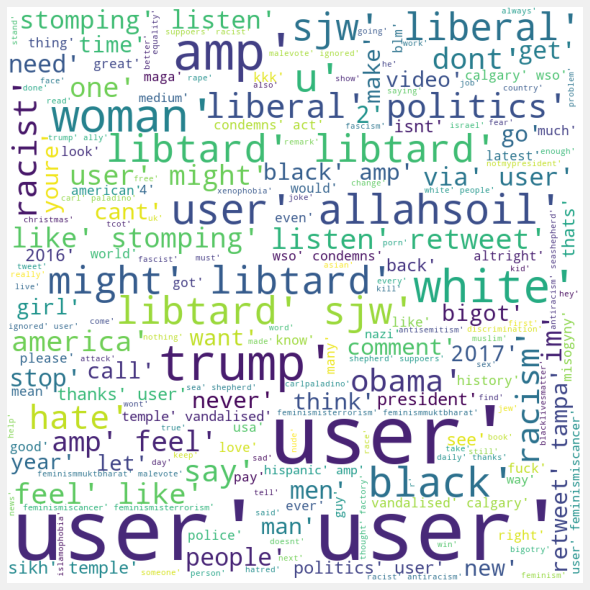

In [25]:
# WordCloud of Hate speech
hate_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

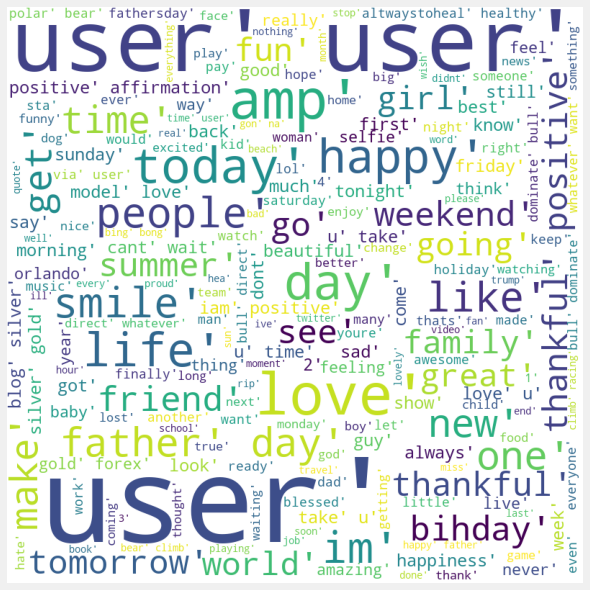

In [26]:
# WordCloud of free speech
free_speech = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Feature Extraction
TF-IDF Model

In [27]:
# import TF-IDF model from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# init the TF-IDF model and take 5000 most frequent words from dictionaries
vectorizer = TfidfVectorizer(max_features= 2000)

In [29]:
# remove the list inside tweet cols which was create due to tokenization
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [30]:
# # fit corpus data into Tf-IDF Model
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()

In [31]:
# Shape of predictor after Feature Engineering
text.shape

(31962, 2000)

Split the Dataset

In [32]:
from sklearn.model_selection import train_test_split

Split the dataset into Train and Test

In [33]:
label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

Training Data

In [34]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (25569, 2000)
y_train (25569,)


Testing Data

In [35]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (6393, 2000)
y_test (6393,)


# Build the CNN with LSTM 


In this part, we build the Convolutional Neural Netowrk(CNN) with Long Short Term Memory(LSTM) Model

Convolutional Neural Netowrk with Long Short Term Memory 

# Importing the Keras libraries and packages

In [36]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Conv1D, ZeroPadding1D, GRU
from tensorflow.keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model

Build the Model

In [37]:
# CNN + LSTM Model
from keras.layers import Reshape

def cnn_lstm(input_dim, output_dim, dropout=0.2, n_layers=1):

    # Input data type
    dtype = 'float32'

    # ---- Network model ----
    input_shape = input_dim + (1,)  # Add an additional dimension for channels
    
    input_data = Input(name='the_input', shape=input_shape, dtype=dtype)
    
    x = Reshape(input_dim)(input_data)  # Reshape the input data
    
    # 1 x 1D convolutional layers with strides 4
    x = Conv1D(filters=256, kernel_size=10, strides=4, name='conv_1')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout, name='dropout_1')(x)
        
    x = LSTM(128, activation='relu', return_sequences=True,
             dropout=dropout, name='lstm_1')(x)
    x = LSTM(128, activation='relu', return_sequences=False,
              dropout=dropout, name='lstm_2')(x)
    
    x = Dense(units=64, activation='relu', name='fc')(x)
    x = Dropout(dropout, name='dropout_2')(x)

    # Output layer with softmax
    y_pred = Dense(units=output_dim, activation='sigmoid', name='sigmoid')(x)

    network_model = Model(inputs=input_data, outputs=y_pred)
    
    return network_model

model = cnn_lstm(X_train.shape[1:],1)

Compile the Model

In [38]:
from keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


Fit the Training Data into Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


#Predict the Train and Test Data 

In [41]:
y_pred_test = model.predict(X_test > 0.5)

200/200 [==============================] - 93s 448ms/step


# Result 

Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

Create and Visualize Confusion Matrix

# Evaluate the Results 

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [ ]:
# Create the Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)

#[row, column]
TP = confusion_matrix[1, 1]        
TN = confusion_matrix[0, 0]           
FP = confusion_matrix[0, 1]           
FN = confusion_matrix[1, 0]


# Visualize the Matrix
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Greens')

# Calculate the Results

In [ ]:
# Accuracy Score
Accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_test, y_pred_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_test, y_pred_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_test, y_pred_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_test, y_pred_test)
print('ROC Area:', Roc) 

# Visualize the Results

In [ ]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

# Make a New Prediction
In the last part, we save our model using the pickle library and then use the save model file for new prediction.

# Save the TF-IDF Vectorizer and SVM Model 

Import Pickle Library to Save the File

In [50]:
import pickle 

Save the Vectorizer

In [51]:
TF_IDF= open("cv.pkl","wb")          
pickle.dump(vectorizer,TF_IDF)                                  
TF_IDF.close()   

Save the model

In [52]:
cnn_lstm = open("model.pkl","wb")          
pickle.dump(model,cnn_lstm)                                  
cnn_lstm.close() 

INFO:tensorflow:Assets written to: ram://bca22595-fad9-49aa-abe0-143b92bbec12/assets


INFO:tensorflow:Assets written to: ram://bca22595-fad9-49aa-abe0-143b92bbec12/assets


## Load the Vectorizer and Model 

Load the Vectorizer

In [53]:
cv = open("cv.pkl","rb")           
cv = pickle.load(cv)                                 
cv

TfidfVectorizer(max_features=2000)

Load the Model

In [ ]:
model = open("model.pkl","rb")           
model = pickle.load(model)                                 

# Make a new Prediction          

Hate Speech prediction example

In [ ]:
# Positive News example
comment = ["I support racism. I don't care"]
vect = cv.transform(comment).toarray()
model.predict(vect)

if model.predict(vect) == 1:
    print("Hate Speech")
else:
    print("Free Speech")

free Speech prediction example

In [ ]:
# Positive News example
comment = [" I respect the all kind of nationalities"]
vect = cv.transform(comment).toarray()
model.predict(vect)

if model.predict(vect) == 1:
    print("Hate Speech")
else:
    print("Free Speech")